
Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



Total number of Ego Nodes =  132 
Number of personal network with >2 circles =  57

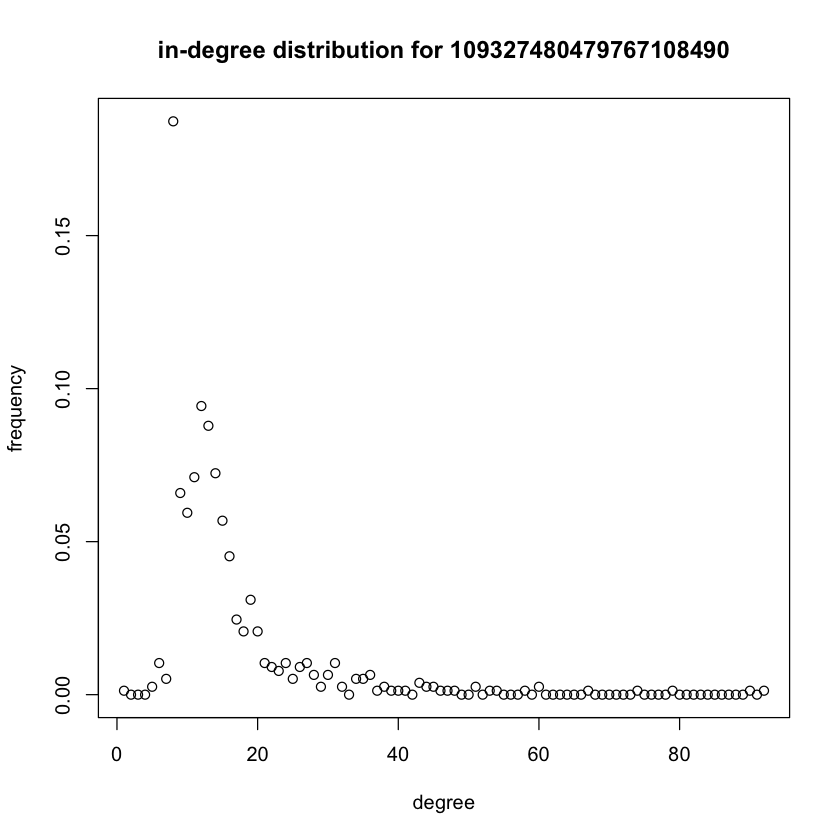

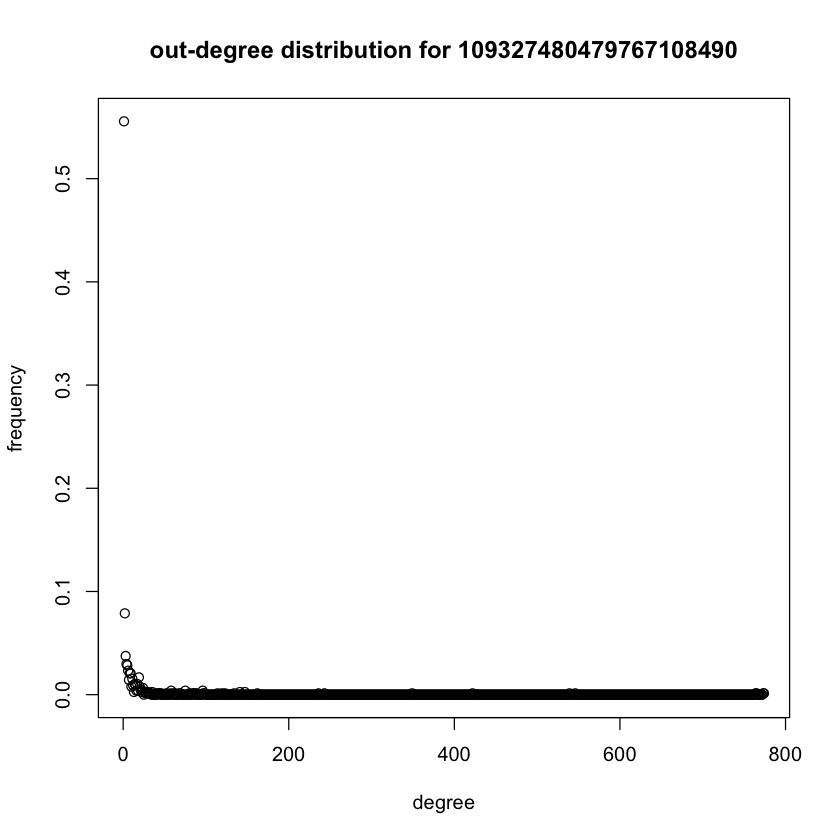

In [1]:
library(igraph)
setwd("/Users/yangyang/Downloads")
file_names = list.files("gplus/")
file_ids = sub("^([^.]*).*","\\1",file_names)
ego_node_ids = unique(file_ids)


cat("Total number of Ego Nodes = " , length(ego_node_ids),"\n")

ids_circles = numeric()
for(id in ego_node_ids){
    circles_file = paste("gplus/",id, ".circles",sep="")
    circles_connect = file(circles_file,open="r")
    circles_content = readLines(circles_connect)
    close(circles_connect)
    
    if(length(circles_content)>2)
        ids_circles = c(ids_circles,id)
}
cat("Number of personal network with >2 circles = ", length(ids_circles))

edges_file = paste("gplus/" , "109327480479767108490"  , ".edges" , sep="")
g_network = read.graph(edges_file , format = "ncol" , directed=TRUE)  
g_network = add.vertices(g_network, nv = 1, name = id)
ego_node_index = which(V(g_network)$name==id) 
  
add_edge_list = c()
for (vertex in 1:(vcount(g_network) - 1)) {
    add_edge_list = c(add_edge_list, c(ego_node_index, vertex))
}
  
g_network = add_edges(g_network, add_edge_list)
d1_in<-degree.distribution(g_network,mode="in")
plot(d1_in,xlab="degree",ylab="frequency",main="in-degree distribution for 109327480479767108490")
d1_out<-degree.distribution(g_network,mode="out")
plot(d1_out,xlab="degree",ylab="frequency",main="out-degree distribution for 109327480479767108490")

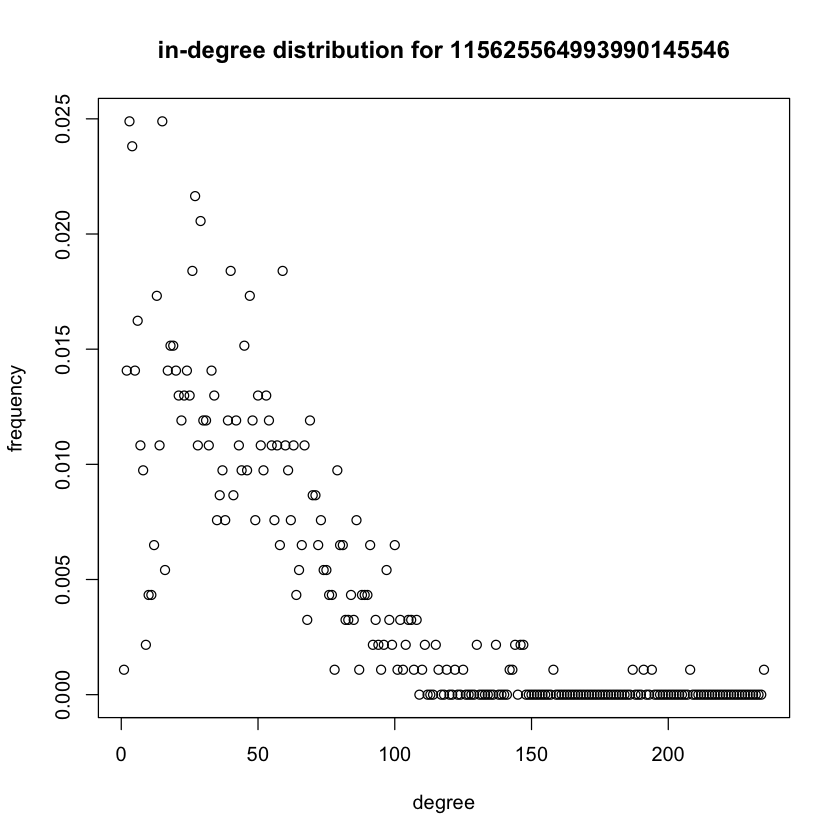

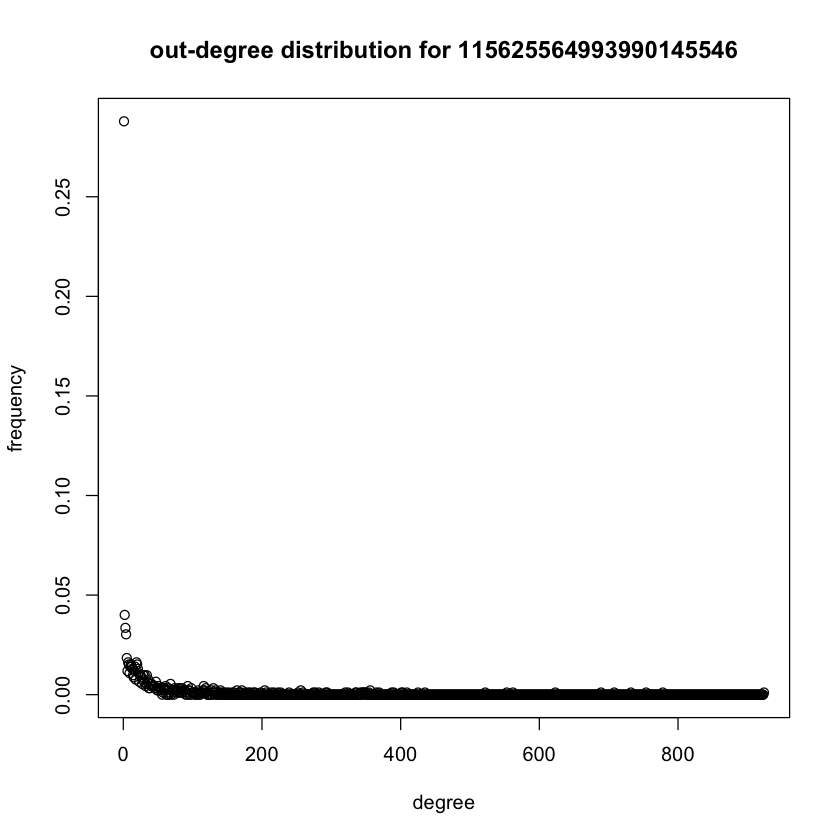

In [3]:
edges_file = paste("gplus/" , "115625564993990145546"  , ".edges" , sep="")
g1_network = read.graph(edges_file , format = "ncol" , directed=TRUE)  
g1_network = add.vertices(g1_network, nv = 1, name = id)
ego_node_index = which(V(g1_network)$name==id) 
  
add_edge_list = c()
for (vertex in 1:(vcount(g1_network) - 1)) {
    add_edge_list = c(add_edge_list, c(ego_node_index, vertex))
}
  
g1_network = add_edges(g1_network, add_edge_list)
d2_in<-degree.distribution(g1_network,mode="in")
plot(d2_in,xlab="degree",ylab="frequency",main="in-degree distribution for 115625564993990145546")
d2_out<-degree.distribution(g1_network,mode="out")
plot(d2_out,xlab="degree",ylab="frequency",main="out-degree distribution for 115625564993990145546")

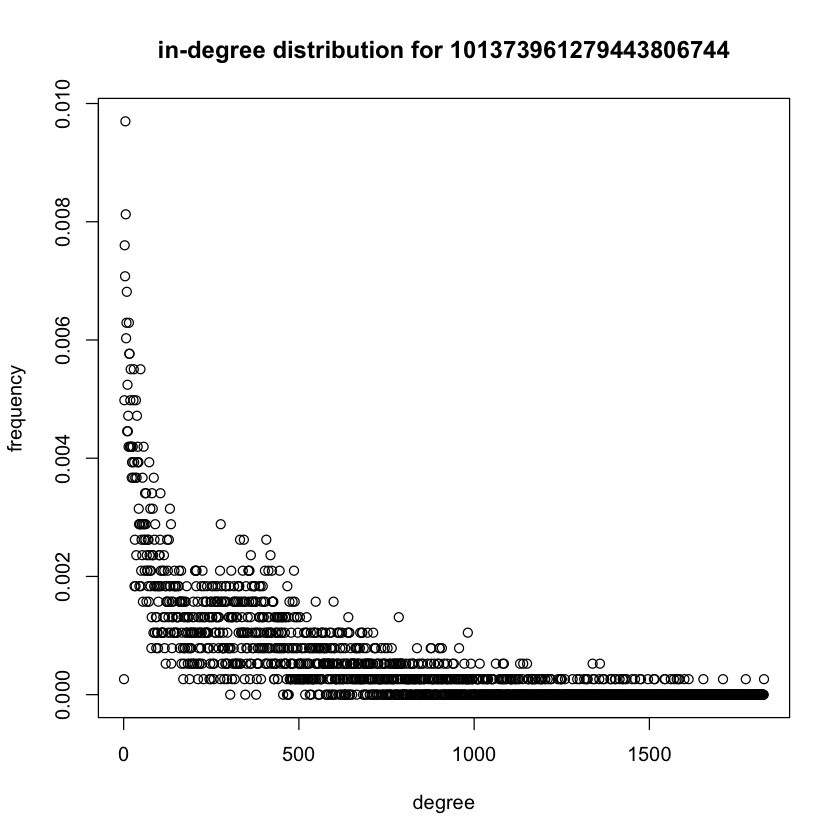

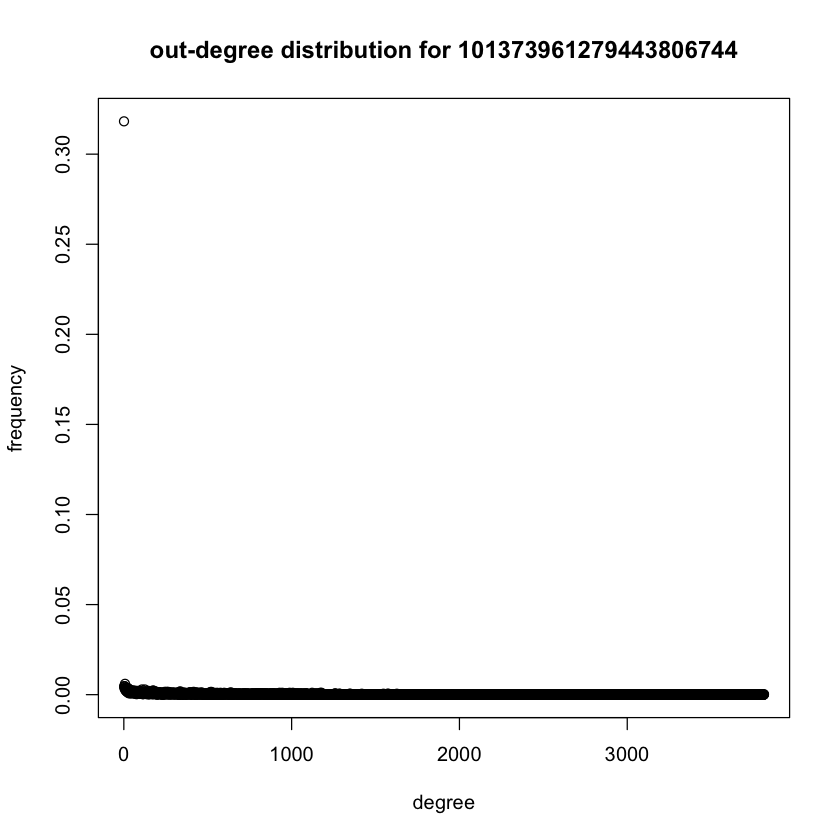

In [2]:
edges_file = paste("gplus/" , "101373961279443806744"  , ".edges" , sep="")
g2_network = read.graph(edges_file , format = "ncol" , directed=TRUE)  
g2_network = add.vertices(g2_network, nv = 1, name = id)
ego_node_index = which(V(g2_network)$name==id) 
  
add_edge_list = c()
for (vertex in 1:(vcount(g2_network) - 1)) {
    add_edge_list = c(add_edge_list, c(ego_node_index, vertex))
}
  
g2_network = add_edges(g2_network, add_edge_list)
d3_in<-degree.distribution(g2_network,mode="in")
plot(d3_in,xlab="degree",ylab="frequency",main="in-degree distribution for 101373961279443806744")
d3_out<-degree.distribution(g2_network,mode="out")
plot(d3_out,xlab="degree",ylab="frequency",main="out-degree distribution for 101373961279443806744")

In [4]:
walktrap_comm = walktrap.community(g_network)
cat("modularity scores of 1st personal network: ", modularity(walktrap_comm),"\n")

walktrap_comm1 = walktrap.community(g1_network)
cat("modularity scores of 2nd personal network: ", modularity(walktrap_comm1),"\n")

walktrap_comm2 = walktrap.community(g2_network)
cat("modularity scores of 3rd personal network: ", modularity(walktrap_comm2),"\n")

modularity scores of 1st personal network:  0.2527654 
modularity scores of 2nd personal network:  0.3194726 
modularity scores of 3rd personal network:  0.1910903 


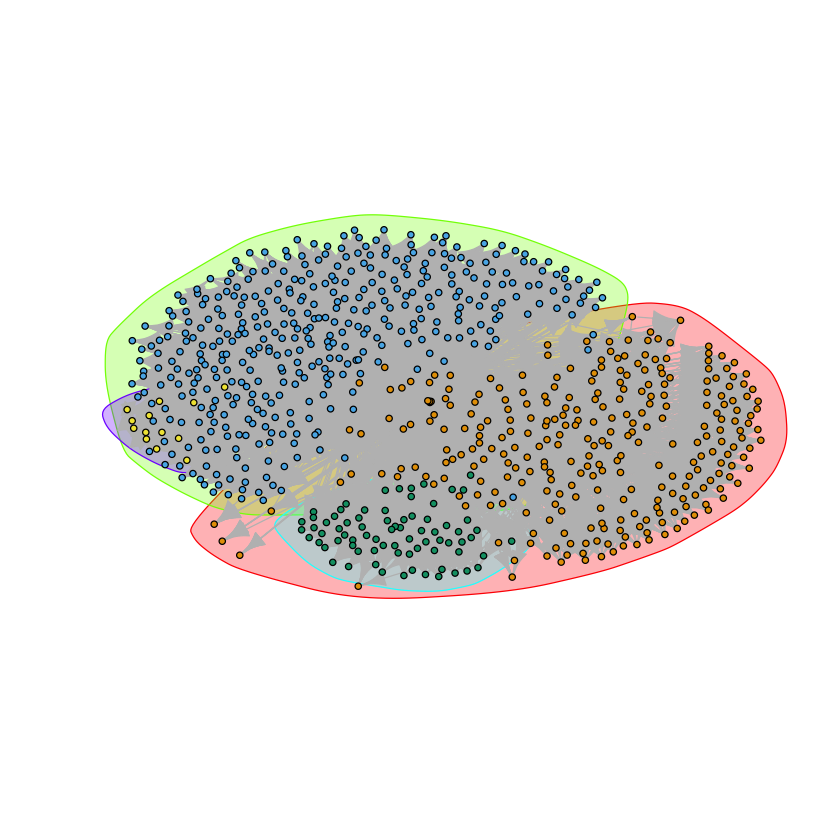

In [12]:
node_size = rep(2, vcount(g_network))
plot(walktrap_comm,g_network, asp = 9/16,vertex.label=NA , edge.color = "grey",vertex.size=node_size)

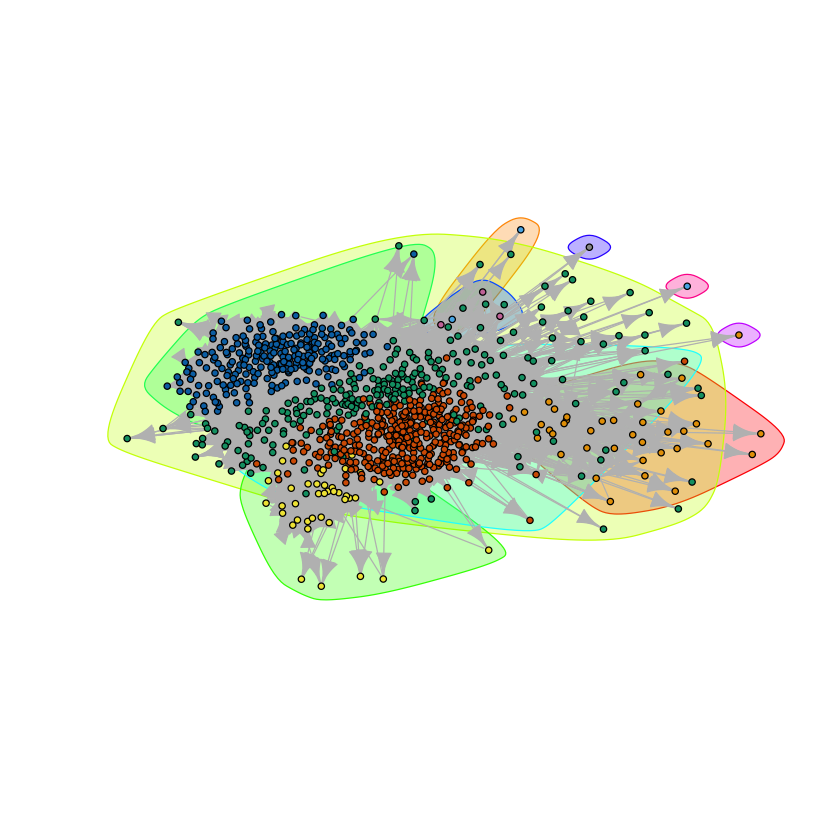

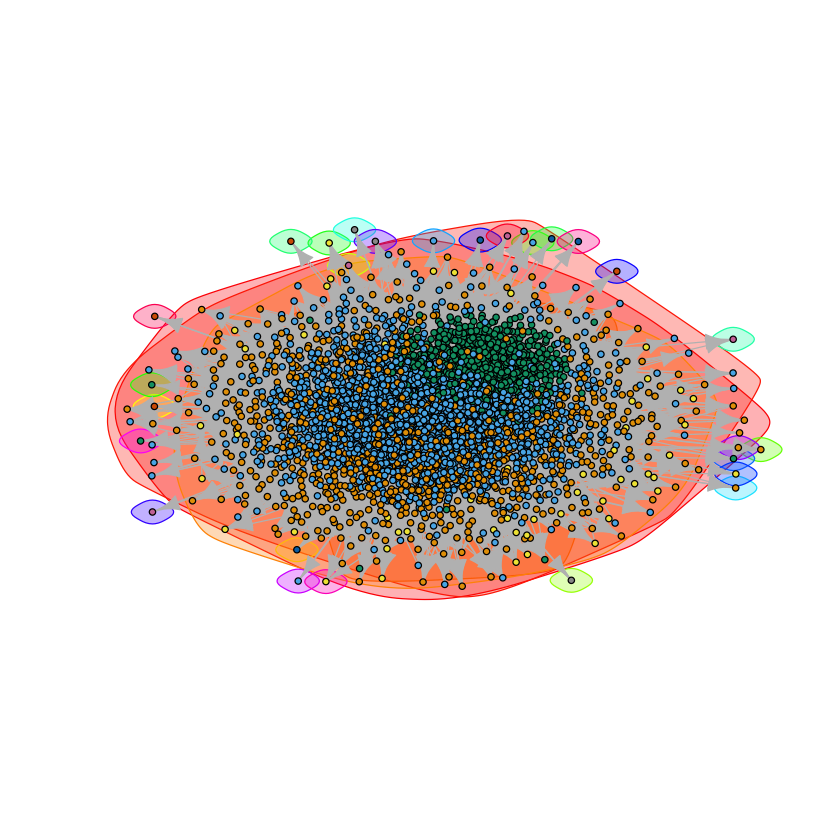

In [13]:
node_size = rep(2, vcount(g1_network))
plot(walktrap_comm1,g1_network, asp = 9/16,vertex.label=NA , edge.color = "grey",vertex.size=node_size)

node_size = rep(2, vcount(g2_network))
plot(walktrap_comm2,g2_network, asp = 9/16,vertex.label=NA , edge.color = "grey",vertex.size=node_size)

In [16]:
HC = function(id, community) {
    circles_file = paste("gplus/",id, ".circles",sep="")
    circles_connect = file(circles_file,open="r")
    circles_content = readLines(circles_connect)
    close(circles_connect)
    circles = list()
    data = vector()
    for (i in 1:length(circles_content)) {
        circle_nodes = strsplit(circles_content[i],"\t")
    for (j in 1 : length(circle_nodes)){
        s1 = circle_nodes[[j]][-1]
        data = append(data,s1)
    }
    circles = c(circles, list(circle_nodes[[1]][-1]))
  }
  
    data = as.list(data)
    N = length(unique(data))
   
    n_cir = length(circles)
    n_com = length(community)
    
    ai = sapply(circles, function(x) length(x)) 
    bi = sizes(community) 

    H_C = -sum(ai/N * log(ai/N))
    H_K = 0
    H_CK = 0
    H_KC = 0
                
    for (j in seq(1, n_com)) {
         b_i = length(intersect(as.numeric(unique(data)),as.numeric(unique(community[[j]]))))
        if (b_i != 0){
            H_K = H_K + b_i/N * log(b_i/N)
        }

        for (i in seq(1, n_cir)) {
            Cji = length(intersect(as.numeric(unique(circles[[i]])), as.numeric(unique(community[[j]]))))
            if (b_i != 0 && Cji != 0){
                H_CK = H_CK + Cji/N * log(Cji/b_i)
            }
            if (Cji != 0){
                H_KC = H_KC + Cji/N * log(Cji/ai[i])
            }

        }
    }
    H_CK = -H_CK
    H_KC = -H_KC
    H_K= -H_K
    

    h = 1 - H_CK/H_C
    c = 1 - H_KC/H_K

    returnResult <- c(h,c)
    returnResult
}
                
                
print(HC("109327480479767108490",walktrap_comm))
print(HC("115625564993990145546",walktrap_comm1))
print(HC("101373961279443806744",walktrap_comm2))               


[1] 0.8518851 0.3298739
[1]  0.4518903 -3.4239623
[1]  0.003866707 -1.504238388
